<a href="https://colab.research.google.com/github/xhang24/xiaotong/blob/master/src/%E2%80%9C20fd2_ipynb%E2%80%9Dhw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
- Goal:
    - Learn the second order derivative approximation: second order central finite difference
    - Understand convergence rate


# Problem 

Let $f(x) = \sin x$. Plot $f''$ and $\delta_{-h} \delta_h f$ with $h = .5$

# Anal


One of the commonly used FD for $f''$ is the following:
$$f''(x) = \frac{d}{dx} f'(x) \simeq \delta_h f'(x) \simeq \delta_h \delta_{-h} f(x).$$
If we write it explicitly, then
$$f''(x) \simeq \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}.$$


__Prop__

The central finite difference for the second order has convergence order $1$.

__Proof__ 

$f(x+h)=f(x)+hf'(x)+h^2\frac{1}{2}f''(x)+h^3\frac{1}{6}f'''(x)+h^4\frac{1}{24}f''''(x)$
$f(x-h)=f(x)-hf'(x)+h^2\frac{1}{2}f''(x)-h^3\frac{1}{6}f'''(x)+h^4\frac{1}{24}f''''(x)$

**Add together**

$f(x+h)+f(x-h)=2f(x)+h^2f''(x)+h^4\frac{1}{12}f''''(x)$

then we can get

$f(x+h)+f(x-h)=2f(x)+h^2f''(x)+h^4\frac{1}{12}f''''(x)$

Divide by $h^2$

$\frac{f(x+h)+f(x-h)-2f(x)}{h^2}=f''(x)+h^2\frac{1}{12}f''''(x)=f''(x)+h^2(\frac{1}{12}f''''(x))=f''(x)+O(h^2)$

**Thus,** 

$f''(x)\simeq \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}.$with truncation error of order $O(h^2)$




# Code

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def sfd(f, x, h):
    # your input here;
    return (f(x+h)-2*f(x)+f(x-h))/(h*h) #central difference 

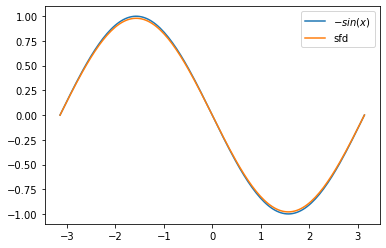

In [98]:
'''
Remove all #s below to plot a figure:
    x_cod: points at which the derivative to be computed
    y_cod: estimated derivative by finite difference
'''



h =0.5

x_co = np.linspace(-1*np.pi, 1*np.pi, 150)
                
plt.plot(x_co, -1*np.sin(x_co), label = '$-sin(x)$');
plt.plot(x_co, sfd(np.sin, x_co, h), label = 'sfd');
plt.legend();


plot log-log chart for the demonstration of convergence rate, find convergence order using linear regression.

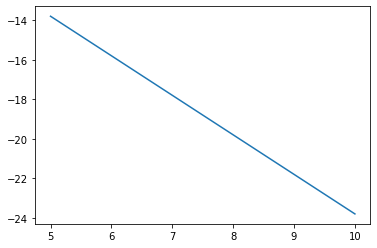

In [99]:
#your input here

x_target = 1*np.pi/3
y_target=-1*np.sin(x_target)
xx=np.arange(5,11)
yy=1/np.power(2,xx)
err=sfd(np.sin,x_target,yy)-(y_target)
yy1=np.log2(np.abs(err))
plt.plot(xx,yy1)

In [100]:
 import scipy.stats as scs
 out=scs.linregress(xx,yy1)
 print('convergence order'+str(-out[0]))



convergence order2.0002350881818582
